# EN3160 Assignment 3 on Neural Networks

## Q01

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [11]:
# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100  # Number of nodes in the hidden layer
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases for two layers
w1 = torch.randn(Din, H) * std  # Input to hidden layer
b1 = torch.zeros(H)
w2 = torch.randn(H, K) * std  # Hidden to output layer
b2 = torch.zeros(K)

# Hyperparameters
epochs = 10
lr = 1e-3  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []


In [12]:
# 3. Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        h = torch.sigmoid(x_train.mm(w1) + b1)  # Hidden layer activation
        y_pred = h.mm(w2) + b2  # Output layer activation (logits for cross-entropy)

        # Loss calculation (Cross-Entropy Loss with regularization)
        loss = nn.functional.cross_entropy(y_pred, labels) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        grad_y_pred = nn.functional.softmax(y_pred, dim=1)  # Softmax output for gradients
        grad_y_pred[range(Ntr), labels] -= 1
        grad_y_pred /= Ntr

        dw2 = h.t().mm(grad_y_pred) + reg * w2
        db2 = grad_y_pred.sum(dim=0)
        dh = grad_y_pred.mm(w2.t()) * h * (1 - h)  # Derivative of sigmoid

        dw1 = x_train.t().mm(dh) + reg * w1
        db1 = dh.sum(dim=0)

        # Parameter updates
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay


Epoch 1/10, Loss: 2.3027544560432434
Epoch 2/10, Loss: 2.302744328737259
Epoch 3/10, Loss: 2.3027530274391173
Epoch 4/10, Loss: 2.3027130236625672
Epoch 5/10, Loss: 2.302716008424759
Epoch 6/10, Loss: 2.302709042072296
Epoch 7/10, Loss: 2.302683682203293
Epoch 8/10, Loss: 2.3026668372154235
Epoch 9/10, Loss: 2.3026695635318757
Epoch 10/10, Loss: 2.302662957429886


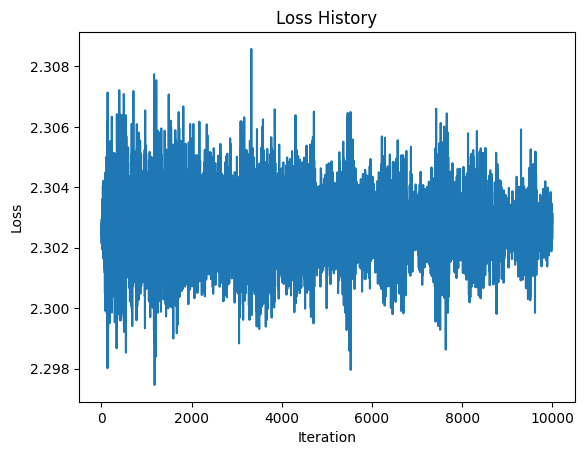

In [13]:
# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [14]:
# 4. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        h = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = h.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

Training accuracy: 10.00%


In [15]:
# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


Test accuracy: 32.44%
